Copyright by Nedelin_Dmitry in 2022

github:https://github.com/Nedelin-Dmitry

In [2]:
import numpy as np # для матриц
import matplotlib.pyplot as plt # для графиков
%matplotlib inline
from scipy import linalg

# Описание задачи

## 17. Метод Штрассена 
*Метод Штрассена* умножения матриц заключается в разбиении матрицы на 4 равные клетки
$$
\left(
\begin{array}{cc}
C_{11} & C_{12}   \\
C_{21} & C_{22}   \\
\end{array}
\right)
=
\left(
\begin{array}{cc}
A_{11} & A_{12}   \\
A_{21} & A_{22}   \\
\end{array}
\right)
\cdot
\left(
\begin{array}{cc}
B_{11} & B_{12}   \\
B_{21} & B_{22}   \\
\end{array}
\right),
$$
 и нахождения
произведения по формулам:
$$
\begin{array}{l}
D_1 = (A_{11} + A_{22}) \cdot (B_{11} + B_{22}), \\
D_2 = (A_{12} - A_{22}) \cdot (B_{21} + B_{22}), \\
D_3 = (A_{11} - A_{21}) \cdot (B_{11} + B_{12}), \\
D_4 = (A_{11} + A_{12}) \cdot B_{22}, \\
D_5 = (A_{21} + A_{22}) \cdot B_{11}, \\
D_6 = A_{11} \cdot (B_{12} - B_{22}), \\
D_7 = A_{22} \cdot (-B_{11}+B_{21}), \\
\end{array}
$$
и
$$
  \begin{array}{l}
    C_{11}  =    D_1   +   D_2             -   D_4                      +    D_7   ,\\
    C_{12}  =                                  D_4            +    D_6,             \\
    C_{21}  =                                            D_5            +    D_7   ,\\
    C_{22}  =    D_1             -   D_3             -   D_5  +    D_6.             \\
  \end{array}
$$

Для нахождения произведений вида $(A_{11} + A_{22}) \cdot (B_{11} + B_{22})$ и т.п.
рекурсивно используется тот же алгоритм.
Если обычный алгоритм умножения квадратных матриц порядка $n$ использует $O(n^3)$ операций,
то алгоритм Штрессана использует только $O(n^{\log_2 7}) = O(n^{2.8})$.
Напишите функцию `strassen(A, B)`, реализующую этот алгоритм для матриц порядка $2^k$.
Экспериментально постройте графики зависимоти времени работы алгоритма Штрассена и обычного алгоритма от порядка матрицы.
Удастся ли вам дойти до таких размеров матриц, что ваша реализация алгоритма Штрассена будет быстрее
обычного алгоритма умножения?

## Задачи:
### 1)Написать функцию strassen(A, B), реализующую этот алгоритм для матриц порядка  $2^k$
### 2)Экспериментально построить графики зависимоти времени работы алгоритма Штрассена и обычного алгоритма от порядка матрицы.
### 3)Выяснить удастся ли дойти до таких размеров матриц, что реализация алгоритма Штрассена будет быстрее обычного алгоритма умножения?

### План реализации:
#### 1)Написать функцию для классического умножения матриц
#### 2)Написать функция реализующую алгоритм Штрассена
#### 3)После серии экспериментов построить графики зависимости времени работы двух алгоритмов от порядка матрицы
#### 4)Сравнить результаты, сделать выводы

## Функция классического умножения матриц
Возьмём 2-е матрицы $A$ и $B$ размером 4x4 и опишем алгоритм подсчёта умножения
$$
\left(
\begin{array}{cc}
A_{11} & A_{12} & A_{13} & A_{14} \\
A_{21} & A_{22} & A_{23} & A_{24}  \\
A_{31} & A_{32} & A_{33} & A_{44}  \\
A_{41} & A_{42} & A_{43} & A_{44}  \\
\end{array}
\right)
\cdot
\left(
\begin{array}{cc}
B_{11} & B_{12} & B_{13} & B_{14} \\
B_{21} & B_{22} & B_{23} & B_{24}  \\
B_{31} & B_{32} & B_{33} & B_{44}  \\
B_{41} & B_{42} & B_{43} & B_{44}  \\
\end{array}
\right)
\cdot
=
\left(
\begin{array}{cc}
C_{11} & C_{12} & C_{13} & C_{14} \\
C_{21} & C_{22} & C_{23} & C_{24}  \\
C_{31} & C_{32} & C_{33} & C_{44}  \\
C_{41} & C_{42} & C_{43} & C_{44}  \\
\end{array}
\right)
$$
Подсчёт первой ячейки:
$$
C11 = ((A11 \cdot B11) + (A12 \cdot B21) + (A13 \cdot B31) + (A14 \cdot B41))
$$

Подсчёт следующей ячейки по гирозонтали:
$$
C12 = ((A11 \cdot B12) + (A12 \cdot B22) + (A13 \cdot B32) + (A14 \cdot B42))
$$

Подсчёт следующей ячейки по вертикали:
$$
C21 = ((A21 \cdot B11) + (A22 \cdot B21) + (A23 \cdot B31) + (A24 \cdot B41))
$$

Пусть $i$ - номер строки массива $A$ , $j$ - номер столбца массива $A$, а $k$ - номер столбца массива $B$, тогда:
$$
C[i][j] = ((A[i][k] \cdot B[k][j]) + (A[i][k + 1] \cdot B[k + 1][j]) + (A[i][k + 2] \cdot B[k + 2][j]) + (...)
$$

По следующей логике напишем функцию классического умножения матриц $MultiSimple$ 

In [2]:
def multisimple(A, B):
    n, m, p = A.shape[0], A.shape[1], B.shape[1] 
    # n - кол-во строк в A, m - кол-во столбцов в A, p - кол-во столбцов в B
    C = np.array([[0]*p for i in range(n)])
    for i in range(n):
        for j in range(p):
            for k in range(m):
                C[i][j] += A[i][k]*B[k][j]

## Функция умножения матриц методом Штрассена
### Теория
Умножение массивов 2x2 выглядит подобным образом
$$
\left(
\begin{array}{c}
a & b\\
c & d\\
\end{array}
\right)
\cdot
\left(
\begin{array}{c}
e & f\\
g & h\\
\end{array}
\right)
=
\left(
\begin{array}{c}
ae + bg & af +bh\\
ce + dg & cf + dh\\
\end{array}
\right)
$$
Но такой спобоб можно применять и для умножения больших массивов, просто разделяя массивы(условно $A$ и $B$) на 4-ре части, меньшие части в свою очередь делить на 4 части, до тех пор пока мы не придём к:
$$
\left(
\begin{array}{c}
ae + bg & af +bh\\
ce + dg & cf + dh\\
\end{array}
\right)
$$
Теперь распишем составные части массива: 
$$ae + bg =(a+d)(e + h) + d(g-e) - (a + b)h + (b - d)(g + h)$$  
$$af +bh = a(f - h) + (a + b)h$$ 
$$ce + dg =(c + d)e + d(g - e)$$  
$$cf + dh =a(f - h) + (a + d)(e + h) - (c + d)e - (a - c)(e + f)$$
и разобьём их множители на состаные части:
$$
\begin{array}{l}
D_1 = (a + d) \cdot (e + h), \\
D_2 = (b - d) \cdot (g + h), \\
D_3 = (a - c) \cdot (e + f), \\
D_4 = (a + b) \cdot h, \\
D_5 = (c + d) \cdot e, \\
D_6 = a \cdot (f - h), \\
D_7 = d \cdot (g - e), \\
\end{array}
$$
Тогда 4 части исходного массива:
$$
  \begin{array}{l}
    C_{11}  =    D_1   +   D_2             -   D_4                      +    D_7   ,\\
    C_{12}  =                                  D_4            +    D_6,             \\
    C_{21}  =                                            D_5            +    D_7   ,\\
    C_{22}  =    D_1             -   D_3             -   D_5  +    D_6.             \\
  \end{array}
$$
### Реализация
1)Написать функцию, которая будет делить массивы на части

2)Написать сам алгоритм Штрассена

## Напишем функцию split(matrix) для деления массива на 4 части:

In [3]:
def split(matrix):
    n = len(matrix) # Узнаём длину массива
    # За раз, мы можем вернуть только одно значение через return, не используя списки / кортежи
    # Но мы можем вернуть по 1-му значению на каждый элемент, в функции strassen мы увидим как это работает
    #Возвращаем срезы
    return matrix[:n//2, :n//2], matrix[:n//2, n//2:], matrix[n//2:, :n//2], matrix[n//2:, n//2:]
            #i-  [0, n//2)             [0, n//2)             [n//2 , n)            [n//2, n)
            #j-  [0, n//2)             [n//2, n)             [0, n//2)             [n//2, n)

## По вышеописанному алгоритму напишем фукцию strassen(A, B):

In [4]:
def MultiSimple(A, B):
    n, m, p = A.shape[0], A.shape[1], B.shape[1] 
    # n - кол-во строк в A, m - кол-во столбцов в A, p - кол-во столбцов в B
    C = np.array([[0]*p for i in range(n)])
    for i in range(n):
        for j in range(p):
            for k in range(m):
                C[i][j] += A[i][k]*B[k][j]
                #O(n**3)
    return C

def Split(matrix):
    n = len(matrix)
    return matrix[:n//2, :n//2], matrix[:n//2, n//2:], matrix[n//2:, :n//2], matrix[n//2:, n//2:]

def strassen(A, B):
    if len(A) <= 2:
        return MultiSimple(A, B)
    a11, a12, a21, a22 = Split(A) # a b c d
    b11, b12, b21, b22 = Split(B) # e f g h
    # A11 A12  a b  |  B11 B12  e f
    # A21 A22  c d  |  B21 B22  g h
    D1 = strassen(a11+a22, b11+b22)
    D2 = strassen(a12-a22, b21+b22)
    D3 = strassen(a11-a21, b11+b12)
    D4 = strassen(a11+a12, b22)
    D5 = strassen(a21+a22, b11)
    D6 = strassen(a11, b12-b22)
    D7 = strassen(a22, b21-b11)
    
    C11 = D1 + D2 - D4 + D7
    C12 = D4 + D6
    C21 = D5 + D7
    C22 = D1 - D3 - D5 + D6
    # горизонтально соединяем C11 C12 и C21 C22 - после чего соединяем это вертикально в полный массив
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

## Серия экспериментов с временем выполнения умножения
1)Задаём размер массивов равный $2^k$

2)Создаём два массива с заданной размерности и заполняем их любыми числами

3)Через команду %%time сравниваем время работы 2-х алгоритмов

In [5]:
#Периодически %%time выдаёт разное время работы, я посчитал среднее из серии запусков
MASS_SIZE = 32
A = np.array([[3]*MASS_SIZE for i in range(MASS_SIZE)])
B = np.array([[4]*MASS_SIZE for i in range(MASS_SIZE)])
print(A)
print(B)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
[[4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 ...
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]]


In [6]:
%%time
#Эти значения слишком малы для построения графика
#2 ≈ 0(ms)
#4 ≈ 0
#8 ≈ 0.998 

#16 ≈ 5.5(ms) ≈ 0,0055(s)
#32 ≈ 43.5 ≈ 0,044(s)
#64 ≈ 286 ≈ 0,29(s)
#128 ≈ 1.96(s)  
#256 ≈ 13.6(s) 
#512 ≈ 1 min 35s ≈ 95(s)
#1024 ≈ 11min 17s ≈ 677(s)
strassen(A, B)

Wall time: 42.4 ms


array([[384, 384, 384, ..., 384, 384, 384],
       [384, 384, 384, ..., 384, 384, 384],
       [384, 384, 384, ..., 384, 384, 384],
       ...,
       [384, 384, 384, ..., 384, 384, 384],
       [384, 384, 384, ..., 384, 384, 384],
       [384, 384, 384, ..., 384, 384, 384]])

In [7]:
%%time
#Эти значения слишком малы для построения графика
#2 ≈ 0(ms)
#4 ≈ 0
#8 ≈ 0.997 

#16 ≈ 2,49(ms) ≈ 0,0025(s)
#32 ≈ 24.9(ms) ≈ 0,025(s)
#64 ≈ 186(ms) ≈ 0,19(s)
#128 ≈ 1.47(s)
#256 ≈ 12
#512 ≈ 1min 37 s ≈ 97s
#1024 ≈ 14min 10s ≈ 850s
MultiSimple(A,B)

Wall time: 22.9 ms


array([[384, 384, 384, ..., 384, 384, 384],
       [384, 384, 384, ..., 384, 384, 384],
       [384, 384, 384, ..., 384, 384, 384],
       ...,
       [384, 384, 384, ..., 384, 384, 384],
       [384, 384, 384, ..., 384, 384, 384],
       [384, 384, 384, ..., 384, 384, 384]])

```
 Размерность массива   Классический алгоритм(s)  Алгоритм Штрассена(s)
         16                      0,0025                 0,0055
         32                      0,025                  0,044
         64                      0,19                   0,29
         128                     1,47                   1,96
         256                     12                     13,6
         512                     97                     95  
         1024                    850                    677
```

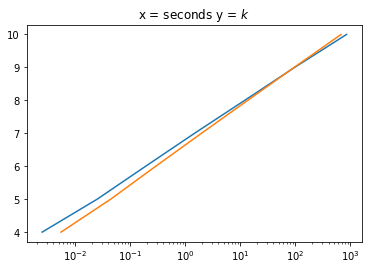

In [31]:
#Обычное построение графиков
#Логарифмический марсштаб
classic = np.array([0.0025,  0.025,  0.19,  1.47,  12.,  97.,  850.])
strassen = np.array([0.0055, 0.044, 0.29, 1.96, 13.6, 95, 677])
#y = np.array([16, 32, 64, 128, 256, 512, 1024])
y = np.array([4, 5, 6, 7, 8, 9, 10])
plt.title(r'x = seconds y = $k$')
#plt.plot(classic, y, label = "classic")
plt.semilogx(classic, y)
plt.semilogx(strassen, y)
pass

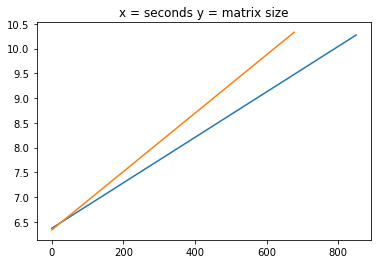

In [32]:
#Используем аппроксимацию для большей наглядности
plt.title(r'x = seconds y = matrix size')
n = len(classic)
X = np.stack((np.ones(n), classic)).T
beta = np.linalg.solve(X.T@X, X.T@y)
beta0, beta1 = beta
plt.plot(classic, X@beta)


n = len(strassen)
X = np.stack((np.ones(n), strassen)).T
beta = np.linalg.solve(X.T@X, X.T@y)
beta0, beta1 = beta
plt.plot(strassen, X@beta)
pass

# Вывод:
Сравнив результаты двух алгоритмов мы выяснили:
Алгоритм Штрассена работает медленее классического умножения матриц на малых значениях, однако с ростом размерности матриц разница во времени выполнения уменьшается. Алгоритм Штрассена работает значительно быстрее на матрицах большой размерности и начинает работать быстрее начиная с размерности $2^9$ (512).